In [1]:
# basic test
import numpy as np
from scipy.spatial import distance

def cal_cosine_distance(x, y):
    dist = distance.cosine(x, y)
    return dist

a = np.array([1, 1, 2, 3, 4])
b = np.array([1, 2, 2, 3, 4])

c = a.dot(b)/(np.linalg.norm(a) * np.linalg.norm(b)) # higher -> more similar
d = cal_cosine_distance(a, b) # smaller -> more similar

print(c)
print(d) 

0.985665765813916
0.014334234186084038


# rerun pyfeat analysis and show top 10 images names

In [21]:
# Test the feat order

def get_target(emotion_name):
    # Anger, Disgust, Fear, Happiness, Sadness, Surprise, Neutral
    # or lowercase
    if emotion_name in ["Anger", "anger"]:
        return 0
    elif emotion_name in ["Disgust", "disgust"]:
        return 1
    elif emotion_name in ["Fear", "fear"]:
        return 2
    elif emotion_name in ["Happiness", "happiness"]:
        return 3
    elif emotion_name in ["Sadness", "sadness"]:
        return 4
    elif emotion_name in ["Surprise", "surprise"]:
        return 5
    elif emotion_name in ["Neutral", "neutral"]:
        return 6

import pandas as pd
from feat import Detector
import os
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from resmasknet import ResMaskNet

detector = Detector(emotion_model = "resmasknet", landmark_model='mobilefacenet')
rmn_model = ResMaskNet()

image_name = f'image_analysis/241121Exp27Baseline/anger/2024_11_21_11_19_21_anger_1.png'
facebox = detector.detect_faces(cv2.imread(image_name))[0][:4]
print(facebox)
res_dic = {}
for target_emotion in ['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise']:
    print('Working hard on', target_emotion)
    # target_emotion = 'anger'
    folder = f'image_analysis/241121Exp27Baseline/{target_emotion}'
    # folder = f'image_analysis/Exp_collections/pairwise_experiment_images/{target_emotion}_selected_imgonly100'
    facebox = detector.detect_faces(cv2.imread(image_name))[0][:4]
    result = []
    for file in os.listdir(folder):
        if 'png' in file:
            image_name = os.path.join(folder, file)
            detection_res = rmn_model.detect_emo(frame=cv2.imread(image_name), detected_face=[facebox])
            output = detection_res[0][get_target(target_emotion)]
            result.append([file, output])
    res_dic[target_emotion] = result
    
    print('finished')

Loading Face Detection model:  retinaface
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/py_feat-0.3.7-py3.7.egg/feat/resources/mobilenet0.25_Final.pth
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/py_feat-0.3.7-py3.7.egg/feat/resources/mobilefacenet_model_best.pth.tar
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/py_feat-0.3.7-py3.7.egg/feat/resources/hog_pca_all_emotio.joblib
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/py_feat-0.3.7-py3.7.egg/feat/resources/hog_pca_all_emotio.joblib
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/py_feat-0.3.7-py3.7.egg/feat/resources/hog_scalar_aus.joblib
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site

/home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator PCA from version 0.24.1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0

Loading emotion model:  resmasknet
[508.76907, 239.63733, 764.87085, 547.06757]
Working hard on anger
finished
Working hard on disgust
finished
Working hard on fear
finished
Working hard on happiness
finished
Working hard on sadness
finished
Working hard on surprise
finished


In [ ]:
res_dic

In [26]:
# for target_emotion in ['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise']:
# for target_emotion in ['anger']:
import pandas as pd

target_emotion = 'anger'
print('Working hard on', target_emotion)
folder = f'image_analysis/241121Exp27Baseline/{target_emotion}'
tl = sorted(res_dic[target_emotion], key=lambda x:int(x[0].split('.png')[0].split('_')[-1]))
for v in tl:
    fn = os.path.join(folder, v[0])
    res1 = v[1]
    
    
    tmp = pd.read_csv(fn.split('.png')[0] + '_output_and_axes.csv')
    # print(v[0], res1, tmp['feat'].tolist()[0])

Working hard on anger


# test

## usage: replace the file name

In [9]:
import pandas as pd
from feat import Detector
import os
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from resmasknet import ResMaskNet

detector = Detector(emotion_model = "resmasknet", landmark_model='mobilefacenet')

def get_box(start_x, start_y, end_x, end_y):
    center_x, center_y = (start_x + end_x) // 2, (start_y + end_y) // 2
    square_length = ((end_x - start_x) + (end_y - start_y)) // 2 // 2
    square_length *= 1.1
    start_x = int(center_x - square_length)
    start_y = int(center_y - square_length)
    end_x = int(center_x + square_length)
    end_y = int(center_y + square_length)
    return start_x, start_y, end_x, end_y
def ensure_color(image):
    if len(image.shape) == 2:
        return np.dstack([image] * 3)
    elif image.shape[2] == 1:
        return np.dstack([image] * 3)
    return image
def get_target(emotion_name):
    # Anger, Disgust, Fear, Happiness, Sadness, Surprise, Neutral
    # or lowercase
    if emotion_name in ["Anger", "anger"]:
        return 0
    elif emotion_name in ["Disgust", "disgust"]:
        return 1
    elif emotion_name in ["Fear", "fear"]:
        return 2
    elif emotion_name in ["Happiness", "happiness"]:
        return 3
    elif emotion_name in ["Sadness", "sadness"]:
        return 4
    elif emotion_name in ["Surprise", "surprise"]:
        return 5
    elif emotion_name in ["Neutral", "neutral"]:
        return 6

image_analysis/231225Exp17NewFeat/prototypes/anger/Prototype_anger.png
[511.85226, 226.58049, 760.38696, 533.24194]
      anger   disgust      fear  happiness   sadness  surprise   neutral  \
0  0.051942  0.019394  0.028615   0.001584  0.030036  0.430995  0.437434   

                                               input  
0  image_analysis/231225Exp17NewFeat/prototypes/a...  
image_analysis/241122Exp31Mixed_v4_alpha0.6_300/anger_v4/2024_11_22_15_49_30_anger_1.png
[513.96106, 235.88953, 768.98816, 540.6678]
image_analysis/241117Exp26/anger/2024_11_17_18_06_52_anger_19.png
[471.50067, 228.65793, 690.4795, 525.29016]


(-0.5, 280.5, 280.5, -0.5)

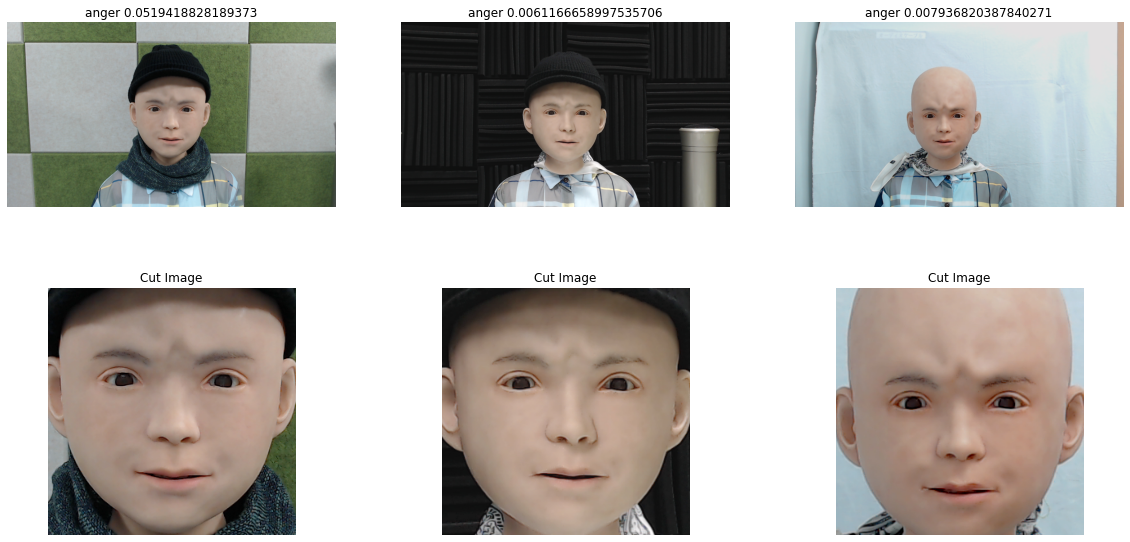

In [10]:
# old
image_name = 'image_analysis/231225Exp17NewFeat/prototypes/anger/Prototype_anger.png'
target_emotion = 'anger'
folder = 'image_analysis/241121Exp27Baseline'


facebox = detector.detect_faces(cv2.imread(image_name))[0][:4]
rmn_model = ResMaskNet()
targetID = get_target(target_emotion)
print(image_name)
print(facebox)
rmn_res = rmn_model.detect_emo(frame=cv2.imread(image_name), detected_face=[facebox])
new_df = pd.DataFrame(rmn_res, columns=["anger", "disgust", "fear", "happiness", "sadness", "surprise", "neutral"])
new_df['input'] = image_name

print(new_df)
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# Original image
testframe = cv2.imread(image_name)
b,g,r = cv2.split(testframe)
frame_rgb = cv2.merge((r,g,b))
axes[0, 0].imshow(frame_rgb)
axes[0, 0].set_title(f'{target_emotion} {list(new_df[target_emotion])[0]}')
axes[0, 0].axis("off")



start_x, start_y, end_x, end_y = get_box(facebox[0], facebox[1], facebox[2], facebox[3])
face = testframe[start_y:end_y, start_x:end_x]
face = ensure_color(face)
b,g,r = cv2.split(face)
face_rgb = cv2.merge((r,g,b))
axes[1, 0].imshow(face_rgb)
axes[1, 0].set_title("Cut Image")
axes[1, 0].axis("off")





# type 2
image_name = 'image_analysis/241122Exp31Mixed_v4_alpha0.6_300/anger_v4/2024_11_22_15_49_30_anger_1.png'
target_emotion = 'anger'

facebox = detector.detect_faces(cv2.imread(image_name))[0][:4]
rmn_model = ResMaskNet()
targetID = get_target(target_emotion)
print(image_name)
print(facebox)
rmn_res = rmn_model.detect_emo(frame=cv2.imread(image_name), detected_face=[facebox])
new_df = pd.DataFrame(rmn_res, columns=["anger", "disgust", "fear", "happiness", "sadness", "surprise", "neutral"])
new_df['input'] = image_name

face = cv2.imread(image_name)
b,g,r = cv2.split(face)
face_rgb = cv2.merge((r,g,b))
axes[0, 1].imshow(face_rgb)
axes[0, 1].set_title(f'{target_emotion} {list(new_df[target_emotion])[0]}')
axes[0, 1].axis("off")

start_x, start_y, end_x, end_y = get_box(facebox[0], facebox[1], facebox[2], facebox[3])
face = face[start_y:end_y, start_x:end_x]
face = ensure_color(face)
b,g,r = cv2.split(face)
face_rgb = cv2.merge((r,g,b))
axes[1, 1].imshow(face_rgb)
axes[1, 1].set_title("Cut Image")
axes[1, 1].axis("off")


# type 3
image_name = 'image_analysis/241117Exp26/anger/2024_11_17_18_06_52_anger_19.png'
target_emotion = 'anger'

facebox = detector.detect_faces(cv2.imread(image_name))[0][:4]
rmn_model = ResMaskNet()
targetID = get_target(target_emotion)
print(image_name)
print(facebox)
rmn_res = rmn_model.detect_emo(frame=cv2.imread(image_name), detected_face=[facebox])
new_df = pd.DataFrame(rmn_res, columns=["anger", "disgust", "fear", "happiness", "sadness", "surprise", "neutral"])
new_df['input'] = image_name

face = cv2.imread(image_name)
b,g,r = cv2.split(face)
face_rgb = cv2.merge((r,g,b))
axes[0, 2].imshow(face_rgb)
axes[0, 2].set_title(f'{target_emotion} {list(new_df[target_emotion])[0]}')
axes[0, 2].axis("off")

start_x, start_y, end_x, end_y = get_box(facebox[0], facebox[1], facebox[2], facebox[3])
face = face[start_y:end_y, start_x:end_x]
face = ensure_color(face)
b,g,r = cv2.split(face)
face_rgb = cv2.merge((r,g,b))
axes[1, 2].imshow(face_rgb)
axes[1, 2].set_title("Cut Image")
axes[1, 2].axis("off")

image_analysis/241121Exp28Mixed_v1/anger/2024_11_21_16_51_44_anger_1.png
[506.87952, 239.49225, 759.5143, 547.6389]
      anger   disgust      fear  happiness   sadness  surprise   neutral  \
0  0.002374  0.000714  0.006887     0.0375  0.007407  0.559229  0.385889   

                                               input  
0  image_analysis/241121Exp28Mixed_v1/anger/2024_...  
image_analysis/241121Exp27Baseline/anger/2024_11_21_11_19_21_anger_1.png
[508.76907, 239.63733, 764.87085, 547.06757]
image_analysis/241122Exp31Mixed_v4_alpha0.6_300/anger_v4/2024_11_22_15_49_30_anger_1.png
[513.96106, 235.88953, 768.98816, 540.6678]


(-0.5, 304.5, 304.5, -0.5)

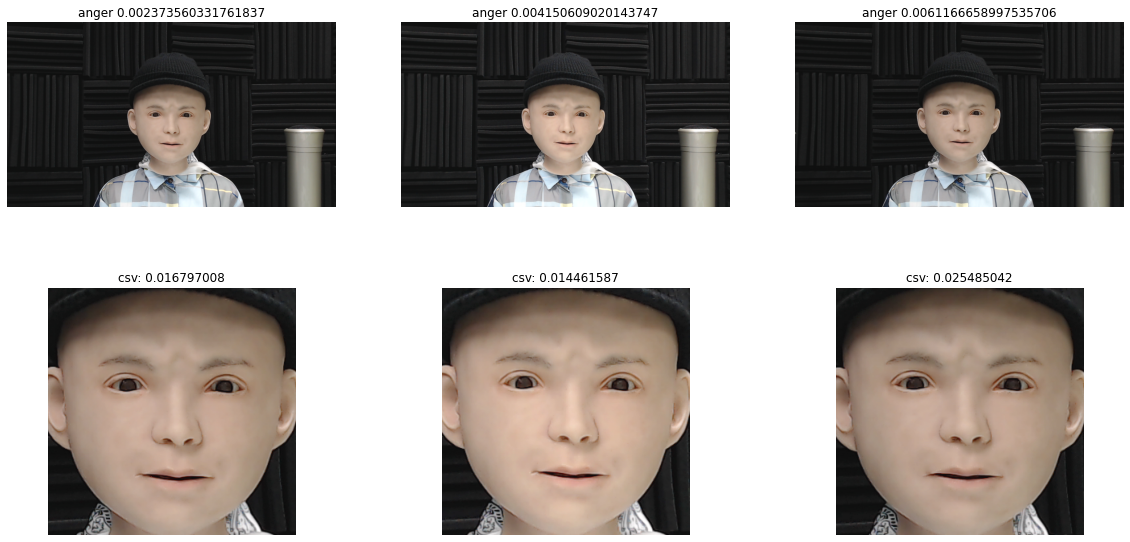

In [34]:
# old
image_name = 'image_analysis/241121Exp28Mixed_v1/anger/2024_11_21_16_51_44_anger_1.png'
target_emotion = 'anger'

facebox = detector.detect_faces(cv2.imread(image_name))[0][:4]
rmn_model = ResMaskNet()
targetID = get_target(target_emotion)
print(image_name)
print(facebox)
rmn_res = rmn_model.detect_emo(frame=cv2.imread(image_name), detected_face=[facebox])
new_df = pd.DataFrame(rmn_res, columns=["anger", "disgust", "fear", "happiness", "sadness", "surprise", "neutral"])
new_df['input'] = image_name

print(new_df)
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# Original image
testframe = cv2.imread(image_name)
b,g,r = cv2.split(testframe)
frame_rgb = cv2.merge((r,g,b))
axes[0, 0].imshow(frame_rgb)
axes[0, 0].set_title(f'{target_emotion} {list(new_df[target_emotion])[0]}')
axes[0, 0].axis("off")



start_x, start_y, end_x, end_y = get_box(facebox[0], facebox[1], facebox[2], facebox[3])
face = testframe[start_y:end_y, start_x:end_x]
face = ensure_color(face)
b,g,r = cv2.split(face)
face_rgb = cv2.merge((r,g,b))
axes[1, 0].imshow(face_rgb)
csvname = image_name.split('.png')[0] + '_output_and_axes.csv'
tmp = pd.read_csv(csvname)
axes[1, 0].set_title(f"csv: {tmp['feat'].tolist()[0]}")
axes[1, 0].axis("off")





# type 2
image_name = 'image_analysis/241121Exp27Baseline/anger/2024_11_21_11_19_21_anger_1.png'
target_emotion = 'anger'

facebox = detector.detect_faces(cv2.imread(image_name))[0][:4]
rmn_model = ResMaskNet()
targetID = get_target(target_emotion)
print(image_name)
print(facebox)
rmn_res = rmn_model.detect_emo(frame=cv2.imread(image_name), detected_face=[facebox])
new_df = pd.DataFrame(rmn_res, columns=["anger", "disgust", "fear", "happiness", "sadness", "surprise", "neutral"])
new_df['input'] = image_name

face = cv2.imread(image_name)
b,g,r = cv2.split(face)
face_rgb = cv2.merge((r,g,b))
axes[0, 1].imshow(face_rgb)
axes[0, 1].set_title(f'{target_emotion} {list(new_df[target_emotion])[0]}')
axes[0, 1].axis("off")

start_x, start_y, end_x, end_y = get_box(facebox[0], facebox[1], facebox[2], facebox[3])
face = face[start_y:end_y, start_x:end_x]
face = ensure_color(face)
b,g,r = cv2.split(face)
face_rgb = cv2.merge((r,g,b))
axes[1, 1].imshow(face_rgb)
csvname = image_name.split('.png')[0] + '_output_and_axes.csv'
tmp = pd.read_csv(csvname)
axes[1, 1].set_title(f"csv: {tmp['feat'].tolist()[0]}")
axes[1, 1].axis("off")


# type 3
image_name = 'image_analysis/241122Exp31Mixed_v4_alpha0.6_300/anger_v4/2024_11_22_15_49_30_anger_1.png'
target_emotion = 'anger'

facebox = detector.detect_faces(cv2.imread(image_name))[0][:4]
rmn_model = ResMaskNet()
targetID = get_target(target_emotion)
print(image_name)
print(facebox)
rmn_res = rmn_model.detect_emo(frame=cv2.imread(image_name), detected_face=[facebox])
new_df = pd.DataFrame(rmn_res, columns=["anger", "disgust", "fear", "happiness", "sadness", "surprise", "neutral"])
new_df['input'] = image_name

face = cv2.imread(image_name)
b,g,r = cv2.split(face)
face_rgb = cv2.merge((r,g,b))
axes[0, 2].imshow(face_rgb)
axes[0, 2].set_title(f'{target_emotion} {list(new_df[target_emotion])[0]}')
axes[0, 2].axis("off")

start_x, start_y, end_x, end_y = get_box(facebox[0], facebox[1], facebox[2], facebox[3])
face = face[start_y:end_y, start_x:end_x]
face = ensure_color(face)
b,g,r = cv2.split(face)
face_rgb = cv2.merge((r,g,b))
axes[1, 2].imshow(face_rgb)
csvname = image_name.split('.png')[0] + '_output_and_axes.csv'
tmp = pd.read_csv(csvname)
axes[1, 2].set_title(f"csv: {tmp['feat'].tolist()[0]}")
axes[1, 2].axis("off")

# prepared functions

In [4]:

import os
import pandas as pd
import copy
import numpy as np
from scipy.spatial import distance
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# 
def cal_cosine_distance(x, y):
    # The smaller value, the more similar for x and y
    dist = distance.cosine(x, y)
    return dist

def cal_cosine_similarity(x, y):
    # The bigger value, the more similar for x and y
    sim = 1 - distance.cosine(x, y)
    return sim

def get_img_array(path, show=False):
    tmp_img = Image.open(path)
    # reshape to (320, 240)
    tmp_img_reshape = tmp_img.resize((320, 240))
    
    if show:
        # Display the image
        plt.imshow(tmp_img_reshape)
        plt.axis('off')  # Turn off axis numbers
        plt.show()
    
    # convert the images to (R,G,B) arrays
    tmp_img_array = np.array(tmp_img_reshape)
    
    # flatten the arrays so they are 1 dimensional vectors
    tmp_img_array = tmp_img_array.flatten()
    
    # divide the arrays by 255, the maximum RGB value to make sure every value is on a 0-1 scale
    tmp_img_array = tmp_img_array/255
    
    return tmp_img_array

# rescale the distance value
def rescale(result):
    test = copy.deepcopy(result)
    sorted_test = sorted(test.items(), key=lambda item: item[1][2], reverse = True)
    print('max is:', sorted_test[0][1][2], '\nmin is:', sorted_test[-1][1][2])
    max_v = sorted_test[0][1][2]
    min_v = sorted_test[-1][1][2]
    print('rescaling...')
#     print(len(sorted_test))
    for i in range(len(sorted_test)):
        sorted_test[i][1][2] = (sorted_test[i][1][2] - min_v) / (max_v - min_v)
    print('rescaled.')
    return sorted_test

def get_target(emotion_name):
    # Anger, Disgust, Fear, Happiness, Sadness, Surprise, Neutral
    # or lowercase
    if emotion_name in ["Anger", "anger"]:
        return 0
    elif emotion_name in ["Disgust", "disgust"]:
        return 1
    elif emotion_name in ["Fear", "fear"]:
        return 2
    elif emotion_name in ["Happiness", "happiness"]:
        return 3
    elif emotion_name in ["Sadness", "sadness"]:
        return 4
    elif emotion_name in ["Surprise", "surprise"]:
        return 5
    elif emotion_name in ["Neutral", "neutral"]:
        return 6


# main loop for dealing with cosine distance 

In [1]:
!python --version
!pip list | grep feat

Python 3.7.12
py-feat                       0.3.7


In [4]:
a = 'image_analysis/Exp_collections/211223ExpHumanoidRaw/Exp7HumanoidRaw/anger/2021_12_23_15_32_24_anger_792_emotion.csv'
a = 'image_analysis/231218Exp15NewFeat/anger/2023_12_19_11_39_37_anger_0_emotion.csv'
s = pd.read_csv(a)
print(s)

b = 'image_analysis/231219Exp16Feat037/anger/2023_12_19_14_49_07_anger_0_emotion.csv'
ss = pd.read_csv(b)
print(ss)

   Unnamed: 0     anger   disgust      fear  happiness   sadness  surprise  \
0           0  0.004275  0.001697  0.015044    0.09833  0.014817  0.723541   

    neutral                                              input  
0  0.142297  image_analysis/anger/2023_12_19_11_39_37_anger...  
   Unnamed: 0     anger   disgust      fear  happiness   sadness  surprise  \
0           0  0.007325  0.000414  0.004266   0.021711  0.003262  0.842857   

    neutral                                              input  
0  0.120165  image_analysis/anger/2023_12_19_14_49_07_anger...  


# new Py-Feat anylyze again

In [2]:
from feat import Detector

detector = Detector(emotion_model = "resmasknet", landmark_model='mobilefacenet')



/home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/nilearn/datasets/__init__.py:96: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)
/home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


Loading Face Detection model:  retinaface
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/py_feat-0.3.7-py3.7.egg/feat/resources/mobilenet0.25_Final.pth
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/py_feat-0.3.7-py3.7.egg/feat/resources/mobilefacenet_model_best.pth.tar
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/py_feat-0.3.7-py3.7.egg/feat/resources/hog_pca_all_emotio.joblib
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/py_feat-0.3.7-py3.7.egg/feat/resources/hog_pca_all_emotio.joblib
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/py_feat-0.3.7-py3.7.egg/feat/resources/hog_scalar_aus.joblib
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site

/home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator PCA from version 0.24.1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0

Loading emotion model:  resmasknet


In [5]:
import copy
import os

ALL_dic = {}
# for target_emotion in ['anger']:
for target_emotion in ['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise']:
    result_dic = {}
    folderName = os.path.join('image_analysis/231219Exp16Feat037/', target_emotion)
    ls_name = os.listdir(folderName)
    for i in ls_name:
        if 'emotion' in i:
            mypath = os.path.join(folderName, i)
            
            # feat analyze
#             df = detector.detect_image(mypath)
#             result = df[target_emotion][0] 
            
            # csv analyze
            temp = pd.read_csv(mypath)
            result = temp[target_emotion][0]
            result = round(result, 6)
            fileName = temp['input'][0]
            result_dic[os.path.join(folderName, i[:-12] + '.png')] = result
    print('old feat emo finished')
    

    folderName = os.path.join('image_analysis/231218Exp15NewFeat/', target_emotion)
    ls_name = os.listdir(folderName)
    count = 0
    for i in ls_name:
        if 'png' in i:
            mypath = os.path.join(folderName, i)
            
            # feat analyze
            df = detector.detect_image(mypath)
            result = df[target_emotion][0] 
            
            # csv analyze
#             temp = pd.read_csv(mypath)
#             result = temp[target_emotion][0]
            result = round(result, 6)
            fileName = df['input'][0]
            result_dic[fileName] = result
            
#             count += 1
#             if count > 10:
#                 break
    print('new ver image old feat analyze finished')
    ALL_dic[target_emotion] = copy.deepcopy(result_dic)
    

old feat emo finished
new ver image old feat analyze finished
old feat emo finished
new ver image old feat analyze finished
old feat emo finished
new ver image old feat analyze finished
old feat emo finished
new ver image old feat analyze finished
old feat emo finished
new ver image old feat analyze finished
old feat emo finished
new ver image old feat analyze finished


In [ ]:
print(ALL_dic['anger'])

In [21]:
import copy
import os
for target_emotion in ['anger']:
    
    result_dic = {}
    
    folderName = os.path.join('image_analysis/231218Exp15NewFeat/', target_emotion)
    ls_name = os.listdir(folderName)
    for i in ls_name:
        if 'emotion' in i:
            mypath = os.path.join(folderName, i)
            
            # feat analyze
#             df = detector.detect_image(mypath)
#             result = df[target_emotion][0] 
            
            # csv analyze
            temp = pd.read_csv(mypath)
            result = temp[target_emotion][0]
            result = round(result, 6)
            fileName = temp['input'][0]
            result_dic[os.path.join(folderName, i[:-12] + '.png')] = result
    print('new feat emo finished')
    

    folderName = os.path.join('image_analysis/231219Exp16Feat037/', target_emotion)
    ls_name = os.listdir(folderName)
    count = 0
    for i in ls_name:
        if 'png' in i:
            mypath = os.path.join(folderName, i)
            
            # feat analyze
            df = detector.detect_image(mypath)
            result = df[target_emotion][0] 
            
            # csv analyze
#             temp = pd.read_csv(mypath)
#             result = temp[target_emotion][0]
            result = round(result, 6)
            fileName = df['input'][0]
            result_dic[fileName] = result
            
            count += 1
            if count > 10:
                break
    print('old ver image new feat analyze finished')
    

{'image_analysis/231219Exp16Feat037/anger/2023_12_19_15_10_59_anger_474.png': 0.013084,
 'image_analysis/231219Exp16Feat037/anger/2023_12_19_15_04_21_anger_347.png': 0.135225,
 'image_analysis/231219Exp16Feat037/anger/2023_12_19_15_02_27_anger_308.png': 0.449606,
 'image_analysis/231219Exp16Feat037/anger/2023_12_19_15_03_30_anger_330.png': 0.026985,
 'image_analysis/231219Exp16Feat037/anger/2023_12_19_15_06_16_anger_386.png': 0.048187,
 'image_analysis/231219Exp16Feat037/anger/2023_12_19_15_01_56_anger_298.png': 0.05281,
 'image_analysis/231219Exp16Feat037/anger/2023_12_19_15_06_26_anger_389.png': 0.467451,
 'image_analysis/231219Exp16Feat037/anger/2023_12_19_15_08_57_anger_437.png': 0.273106,
 'image_analysis/231219Exp16Feat037/anger/2023_12_19_14_54_37_anger_138.png': 0.021715,
 'image_analysis/231219Exp16Feat037/anger/2023_12_19_15_02_59_anger_319.png': 0.370781,
 'image_analysis/231219Exp16Feat037/anger/2023_12_19_15_11_17_anger_480.png': 0.003828}

# choose top 10

## ALL_dic, top 50

In [19]:
for target_emotion in ['happiness']:
    res_value_order = sorted(ALL_dic[target_emotion].items(), key=lambda item: item[1], reverse = True)
    res_value_order = [list(x) for x in res_value_order[:30]]
#     print(target_emotion)
    for i in res_value_order:
            print(i)
#     print(res_value_order)
#     print()


# len(ALL_dic[target_emotion])

['image_analysis/231218Exp15NewFeat/happiness/2023_12_19_13_14_42_happiness_337.png', 0.956833]
['image_analysis/231218Exp15NewFeat/happiness/2023_12_19_13_20_47_happiness_443.png', 0.951191]
['image_analysis/231218Exp15NewFeat/happiness/2023_12_19_13_15_05_happiness_344.png', 0.950566]
['image_analysis/231218Exp15NewFeat/happiness/2023_12_19_13_14_38_happiness_336.png', 0.95015]
['image_analysis/231218Exp15NewFeat/happiness/2023_12_19_13_21_39_happiness_457.png', 0.946825]
['image_analysis/231218Exp15NewFeat/happiness/2023_12_19_13_16_14_happiness_365.png', 0.944964]
['image_analysis/231218Exp15NewFeat/happiness/2023_12_19_13_13_21_happiness_313.png', 0.944349]
['image_analysis/231218Exp15NewFeat/happiness/2023_12_19_13_19_57_happiness_429.png', 0.942714]
['image_analysis/231218Exp15NewFeat/happiness/2023_12_19_13_18_39_happiness_407.png', 0.939112]
['image_analysis/231218Exp15NewFeat/happiness/2023_12_19_13_12_17_happiness_294.png', 0.938941]
['image_analysis/231218Exp15NewFeat/happi

In [26]:
6440*2+14300+4400+431*16*2

45372

In [27]:
431*16

6896

In [23]:
res_value_order = sorted(ALL_dic['happiness'].items(), key=lambda item: item[1], reverse = True)
res_value_order = [list(x) for x in res_value_order[:50]]
print(res_value_order)
# copyImageToNewFolder(res_value_order, 'happiness')

[['image_analysis/231218Exp15NewFeat/happiness/2023_12_19_13_14_42_happiness_337.png', 0.956833], ['image_analysis/231218Exp15NewFeat/happiness/2023_12_19_13_20_47_happiness_443.png', 0.951191], ['image_analysis/231218Exp15NewFeat/happiness/2023_12_19_13_15_05_happiness_344.png', 0.950566], ['image_analysis/231218Exp15NewFeat/happiness/2023_12_19_13_14_38_happiness_336.png', 0.95015], ['image_analysis/231218Exp15NewFeat/happiness/2023_12_19_13_21_39_happiness_457.png', 0.946825], ['image_analysis/231218Exp15NewFeat/happiness/2023_12_19_13_16_14_happiness_365.png', 0.944964], ['image_analysis/231218Exp15NewFeat/happiness/2023_12_19_13_13_21_happiness_313.png', 0.944349], ['image_analysis/231218Exp15NewFeat/happiness/2023_12_19_13_19_57_happiness_429.png', 0.942714], ['image_analysis/231218Exp15NewFeat/happiness/2023_12_19_13_18_39_happiness_407.png', 0.939112], ['image_analysis/231218Exp15NewFeat/happiness/2023_12_19_13_12_17_happiness_294.png', 0.938941], ['image_analysis/231218Exp15Ne

In [12]:
an_temp = [['image_analysis/231219Exp16Feat037/anger/2023_12_19_14_58_49_anger_230.png', 0.877257], ['image_analysis/231219Exp16Feat037/anger/2023_12_19_14_51_46_anger_69.png', 0.862081], ['image_analysis/231219Exp16Feat037/anger/2023_12_19_14_51_19_anger_58.png', 0.8548], ['image_analysis/231219Exp16Feat037/anger/2023_12_19_14_53_06_anger_102.png', 0.850181], ['image_analysis/231219Exp16Feat037/anger/2023_12_19_14_51_51_anger_71.png', 0.84205], ['image_analysis/231219Exp16Feat037/anger/2023_12_19_15_10_12_anger_460.png', 0.83136], ['image_analysis/231219Exp16Feat037/anger/2023_12_19_15_10_44_anger_469.png', 0.825715], ['image_analysis/231219Exp16Feat037/anger/2023_12_19_15_07_47_anger_414.png', 0.823748], ['image_analysis/231219Exp16Feat037/anger/2023_12_19_14_52_11_anger_79.png', 0.821694], ['image_analysis/231219Exp16Feat037/anger/2023_12_19_15_03_28_anger_329.png', 0.821136]]

In [6]:
# ALL_dic
import matplotlib.pyplot as plt
NUM_OF_SELECT = 4 - 1

def get_img_array(path, show=False):
    original_image = Image.open(path)
    # use crop, by hand
    
#     print(original_image.size)
    # Define the crop area
    left = 280  # X-coordinate of the top left corner
    top = 75   # Y-coordinate of the top left corner
    right = 1000 # X-coordinate of the bottom right corner
    bottom = 700 # Y-coordinate of the bottom right corner
    crop_area = (left, top, right, bottom)

    # Crop the image
    cropped_image = original_image.crop(crop_area)
#     print(cropped_image.size)

#     tmp_img_reshape = tmp_img.resize((320, 240))
    
    if show:
        # Display the image
        plt.imshow(cropped_image)
        plt.axis('off')  # Turn off axis numbers
        plt.show()
    
    # convert the images to (R,G,B) arrays
    tmp_img_array = np.array(cropped_image)
    
    # flatten the arrays so they are 1 dimensional vectors
    tmp_img_array = tmp_img_array.flatten()
    
    # divide the arrays by 255, the maximum RGB value to make sure every value is on a 0-1 scale
    tmp_img_array = tmp_img_array/255
    
    return tmp_img_array

# for target_emotion in ['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise']:
for target_emotion in ['anger']:
    res_value_order = sorted(ALL_dic[target_emotion].items(), key=lambda item: item[1], reverse = True)
    res_value_order = [list(x) for x in res_value_order[:20]]
    
    res_value_order = an_temp
#     print(target_emotion)
#     print(res_value_order)
#     print()
    
    # get all img array
    res_img_array = {}

    for i in res_value_order:
        temp_img_array = get_img_array(i[0])
        res_img_array[i[0]] = [i[1], temp_img_array]
    
    

    # compute all similarity
    data_length = len(res_img_array.keys())
    nameList = list(res_img_array.keys())
    cos_dis_result = {}
    cos_dis_result_listform = []
    counter = 0
    for i in range(data_length):
        for j in range(i + 1, data_length):
            vec1 = res_img_array[nameList[i]][1]
            vec2 = res_img_array[nameList[j]][1]
            cos_dis = cal_cosine_distance(vec1, vec2)
            if cos_dis == 0.0:
                raise Exception('ERROR, counter is ' + str(counter), i, j)
            tmp = [nameList[i], nameList[j], cos_dis]
            cos_dis_result_listform.append(tmp)
            cos_dis_result[counter] = tmp
            counter += 1
            
            
    rescale_cos_dis_result = rescale(cos_dis_result)
    
    # in this dic, I use all img name as the first id of the dic, there inner dic, which contains all the img name except itself.
    # I store the rating in the inner dic
    #     print('res_img_array', res_img_array)
    res_dic_rescaled_cos_dis = {i:{} for i in res_img_array.keys()}
    
    for i in rescale_cos_dis_result:
        tempa = i[1][0]
        tempb = i[1][1]
        temp_score = i[1][2]
        res_dic_rescaled_cos_dis[tempa][tempb] = temp_score
        res_dic_rescaled_cos_dis[tempb][tempa] = temp_score    

    # greedy search
#     print('res_dic_rescaled_cos_dis', res_dic_rescaled_cos_dis)
    
    count = 1
    finalResult = []
    finalResult.append(res_value_order[0])
#     finalResult.append(res_value_order[-1])
    x_list = []
    # print(finalResult)
    for i in range(len(finalResult)):
        x_list.append(finalResult[i][0])
    # print(x_list)
    for count in range(NUM_OF_SELECT):
        # for storing the distance from the selected list to others 
        y_list = []

        # find interest keys, which is not in x_list
        cur_keys = ''

        for i in x_list:
            if cur_keys == '':
                cur_keys = res_dic_rescaled_cos_dis[i].keys()
            else:
                type(cur_keys)
                cur_keys = cur_keys & res_dic_rescaled_cos_dis[i].keys()
        cur_dic = dict.fromkeys(cur_keys, 0)
        for k in x_list:
            assert k not in cur_dic 
        for i in cur_dic.keys():
            for j in x_list:
                cur_dic[i] += res_dic_rescaled_cos_dis[i][j]
    #     print(len(cur_keys))
        largeest_dis_target_name = max(cur_dic, key=cur_dic.get)
        pos_of_largeest_dis_target_name = [index1 for index1,value1 in 
         enumerate(res_value_order) for index2,value2 in enumerate(value1) if value2==largeest_dis_target_name][0]
        x_list.append(largeest_dis_target_name)
        finalResult.append(res_value_order[pos_of_largeest_dis_target_name])
        
#     finalResult = sorted(finalResult, key=lambda x: x[1], reverse = True)
#     print(finalResult[:10])

NameError: name 'an_temp' is not defined

In [14]:
print(finalResult)

[['image_analysis/231219Exp16Feat037/anger/2023_12_19_14_58_49_anger_230.png', 0.877257], ['image_analysis/231219Exp16Feat037/anger/2023_12_19_14_51_19_anger_58.png', 0.8548], ['image_analysis/231219Exp16Feat037/anger/2023_12_19_15_10_44_anger_469.png', 0.825715], ['image_analysis/231219Exp16Feat037/anger/2023_12_19_14_51_46_anger_69.png', 0.862081]]


In [28]:
# selected
selected_Online_Exp_2 = {}
selected_Online_Exp_2['anger'] = [['image_analysis/231219Exp16Feat037/anger/2023_12_19_14_58_49_anger_230.png', 0.877257], ['image_analysis/231219Exp16Feat037/anger/2023_12_19_14_51_19_anger_58.png', 0.8548], ['image_analysis/231219Exp16Feat037/anger/2023_12_19_15_10_44_anger_469.png', 0.825715], ['image_analysis/231219Exp16Feat037/anger/2023_12_19_14_51_46_anger_69.png', 0.862081]]
selected_Online_Exp_2['disgust'] = [['image_analysis/231219Exp16Feat037/disgust/2023_12_19_16_38_10_disgust_446.png', 0.935409], ['image_analysis/231218Exp15NewFeat/disgust/2023_12_19_12_12_37_disgust_192.png', 0.933728], ['image_analysis/231218Exp15NewFeat/disgust/2023_12_19_12_13_54_disgust_215.png', 0.922659], ['image_analysis/231219Exp16Feat037/disgust/2023_12_19_16_32_44_disgust_325.png', 0.922036]]
selected_Online_Exp_2['fear'] = [['image_analysis/231219Exp16Feat037/fear/2023_12_19_16_55_14_fear_356.png', 0.938642], ['image_analysis/231218Exp15NewFeat/fear/2023_12_19_12_46_22_fear_321.png', 0.930199], ['image_analysis/231218Exp15NewFeat/fear/2023_12_19_12_40_52_fear_218.png', 0.914898], ['image_analysis/231219Exp16Feat037/fear/2023_12_19_17_01_10_fear_491.png', 0.911653]]
selected_Online_Exp_2['happiness'] = [['image_analysis/231218Exp15NewFeat/happiness/2023_12_19_13_14_42_happiness_337.png', 0.956833], ['image_analysis/231218Exp15NewFeat/happiness/2023_12_19_15_24_06_happiness_278.png', 0.910493], ['image_analysis/231218Exp15NewFeat/happiness/2023_12_19_13_17_34_happiness_388.png', 0.8365], ['image_analysis/231218Exp15NewFeat/happiness/2023_12_19_15_26_26_happiness_334.png', 0.4834]]
selected_Online_Exp_2['sadness'] = [['image_analysis/231219Exp16Feat037/sadness/2023_12_19_15_51_40_sadness_370.png', 0.92779], ['image_analysis/231218Exp15NewFeat/sadness/2023_12_19_13_28_55_sadness_79.png', 0.904773], ['image_analysis/231219Exp16Feat037/sadness/2023_12_19_15_55_02_sadness_437.png', 0.904087], ['image_analysis/231219Exp16Feat037/sadness/2023_12_19_15_47_59_sadness_293.png', 0.901349]]
selected_Online_Exp_2['surprise'] = [['image_analysis/231218Exp15NewFeat/surprise/2023_12_19_13_57_55_surprise_101.png', 0.998629], ['image_analysis/231219Exp16Feat037/surprise/2023_12_19_16_00_58_surprise_64.png', 0.997973], ['image_analysis/231219Exp16Feat037/surprise/2023_12_19_16_19_25_surprise_496.png', 0.997658], ['image_analysis/231218Exp15NewFeat/surprise/2023_12_19_13_55_34_surprise_55.png', 0.997651]]



In [15]:
# COPY_FLAG = 0 # 1 is copy, 0 - no copy
# NUM_OF_SELECT = 5 - 1

# # get all img array, for anger
# for target_emotion in ['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise']:
#     folderName = os.path.join('image_analysis/211223ExpHumanoidRaw/Exp7HumanoidRaw/', target_emotion)
#     ls_name = os.listdir(folderName)
# #     print(ls_name)
#     result_dic = {}

#     for i in ls_name:
#         if 'emotion' in i:
#             mypath = os.path.join(folderName, i)
#             temp = pd.read_csv(mypath)
#             result = temp[target_emotion][0]
#             result = round(result, 6)
#             fileName = temp['input'][0]
#             result_dic[i[:-12] + '.png'] = result
#     # sort in value order 
#     res_value_order = sorted(result_dic.items(), key=lambda item: item[1], reverse = True)
    
#     ##### choose top 10
#     res_value_order = res_value_order[:10]
#     print(target_emotion)
# #     print(len(res_value_order))
# #     print(len(res_value_order))
#     for i in res_value_order:
#         print(i)
#     print()

In [48]:
COPY_FLAG = 0 # 1 is copy, 0 - no copy
NUM_OF_SELECT = 5 - 1

# get all img array, for anger
for target_emotion in ['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise']:
    folderName = os.path.join('image_analysis/211223ExpHumanoidRaw/Exp7HumanoidRaw/', target_emotion)
    ls_name = os.listdir(folderName)
#     print(ls_name)
    result_dic = {}

    for i in ls_name:
        if 'emotion' in i:
            mypath = os.path.join(folderName, i)
            temp = pd.read_csv(mypath)
            result = temp[target_emotion][0]
            result = round(result, 6)
            fileName = temp['input'][0]
            result_dic[i[:-12] + '.png'] = result
    # sort in value order 
    res_value_order = sorted(result_dic.items(), key=lambda item: item[1], reverse = True)
    
    ##### choose top 10
    res_value_order = res_value_order[:10]
    print(len(res_value_order))
#     print(len(res_value_order))
#     print(res_value_order)
#     break
    

    
    # get all img array
    res_img_array = {}

    for i in res_value_order:
        temp_img_array = get_img_array(os.path.join(folderName, i[0]))
        res_img_array[i[0]] = [i[1], temp_img_array]

    # compute all similarity
    data_length = len(res_img_array.keys())
    nameList = list(res_img_array.keys())
    cos_dis_result = {}
    cos_dis_result_listform = []
    counter = 0
    for i in range(data_length):
        for j in range(i + 1, data_length):
            vec1 = res_img_array[nameList[i]][1]
            vec2 = res_img_array[nameList[j]][1]
            cos_dis = cal_cosine_distance(vec1, vec2)
            if cos_dis == 0.0:
                raise Exception('ERROR, counter is ' + str(counter), i, j)
            tmp = [nameList[i], nameList[j], cos_dis]
            cos_dis_result_listform.append(tmp)
            cos_dis_result[counter] = tmp
            counter += 1
    rescale_cos_dis_result = rescale(cos_dis_result)

    # in this dic, I use all img name as the first id of the dic, there inner dic, which contains all the img name except itself.
    # I store the rating in the inner dic
    #     print('res_img_array', res_img_array)
    res_dic_rescaled_cos_dis = {i:{} for i in res_img_array.keys()}
    
    for i in rescale_cos_dis_result:
        tempa = i[1][0]
        tempb = i[1][1]
        temp_score = i[1][2]
        res_dic_rescaled_cos_dis[tempa][tempb] = temp_score
        res_dic_rescaled_cos_dis[tempb][tempa] = temp_score    

    # greedy search
#     print('res_dic_rescaled_cos_dis', res_dic_rescaled_cos_dis)
    
    count = 1
    finalResult = []
    finalResult.append(res_value_order[0])
#     finalResult.append(res_value_order[-1])
    x_list = []
    # print(finalResult)
    for i in range(len(finalResult)):
        x_list.append(finalResult[i][0])
    # print(x_list)
    for count in range(NUM_OF_SELECT):
        # for storing the distance from the selected list to others 
        y_list = []

        # find interest keys, which is not in x_list
        cur_keys = ''

        for i in x_list:
            if cur_keys == '':
                cur_keys = res_dic_rescaled_cos_dis[i].keys()
            else:
                type(cur_keys)
                cur_keys = cur_keys & res_dic_rescaled_cos_dis[i].keys()
        cur_dic = dict.fromkeys(cur_keys, 0)
        for k in x_list:
            assert k not in cur_dic 
        for i in cur_dic.keys():
            for j in x_list:
                cur_dic[i] += res_dic_rescaled_cos_dis[i][j]
    #     print(len(cur_keys))
        largeest_dis_target_name = max(cur_dic, key=cur_dic.get)
        pos_of_largeest_dis_target_name = [index1 for index1,value1 in 
         enumerate(res_value_order) for index2,value2 in enumerate(value1) if value2==largeest_dis_target_name][0]
        x_list.append(largeest_dis_target_name)
        finalResult.append(res_value_order[pos_of_largeest_dis_target_name])


    # Copy files
    sum_folderName = os.path.join(folderName, 'selected{}'.format(NUM_OF_SELECT))
    img_only_folderName = os.path.join(folderName, 'selected_imgonly{}'.format(NUM_OF_SELECT))
    if COPY_FLAG and not os.path.exists(sum_folderName):
        try:
            os.mkdir(sum_folderName)
        except Exception as e:
            print(e)
    if COPY_FLAG and not os.path.exists(img_only_folderName):
        try:
            os.mkdir(img_only_folderName)
        except Exception as e:
            print(e)

    import shutil
    for i in finalResult:
        # i is fig name
        print(i[0], i[1])
        img_file_name = os.path.join(folderName, i[0])
        csv_file_name = os.path.join(folderName, i[0][:-4] + '.csv')
        axes_file_name = os.path.join(folderName, i[0][:-4] + '_axes_data.csv')
        emotion_file_name = os.path.join(folderName, i[0][:-4] + '_emotion.csv')

        # all files
        if COPY_FLAG and not os.path.exists(os.path.join(sum_folderName, i[0])):
            shutil.copy(img_file_name, sum_folderName)
            print('copied0')
        if COPY_FLAG and not os.path.exists(os.path.join(sum_folderName, i[0][:-4] + '.csv')):
            shutil.copy(csv_file_name, sum_folderName)
            print('copied1')
        if COPY_FLAG and not os.path.exists(os.path.join(sum_folderName, i[0][:-4] + '_axes_data.csv')):
            shutil.copy(axes_file_name, sum_folderName)
            print('copied2')
        if COPY_FLAG and not os.path.exists(os.path.join(sum_folderName, i[0][:-4] + '_emotion.csv')):
            shutil.copy(emotion_file_name, sum_folderName)
            print('copied3')

        if COPY_FLAG and not os.path.exists(os.path.join(img_only_folderName, i[0])):
            shutil.copy(img_file_name, img_only_folderName)
            print('copied4')

10
max is: 0.0013050432051180394 
min is: 9.090029064962035e-05
rescaling...
rescaled.
2021_12_23_15_32_12_anger_772.png 0.936236
2021_12_23_15_33_23_anger_902.png 0.913679
2021_12_23_15_30_17_anger_562.png 0.914131
2021_12_23_15_27_09_anger_212.png 0.931665
2021_12_23_15_30_51_anger_622.png 0.929667
10
max is: 0.0011884868817438887 
min is: 0.00012923191170677306
rescaling...
rescaled.
2021_12_23_15_42_21_disgust_822.png 0.827066
2021_12_23_15_36_16_disgust_142.png 0.756644
2021_12_23_15_42_43_disgust_862.png 0.767849
2021_12_23_15_40_02_disgust_562.png 0.803605
2021_12_23_15_42_00_disgust_782.png 0.789126
10
max is: 0.0008899584555609463 
min is: 6.940063140969954e-05
rescaling...
rescaled.
2021_12_23_15_50_44_fear_792.png 0.836327
2021_12_23_15_50_03_fear_712.png 0.741456
2021_12_23_15_51_09_fear_842.png 0.619278
2021_12_23_15_52_23_fear_982.png 0.695252
2021_12_23_15_49_53_fear_692.png 0.651133
10
max is: 0.0014465283592445255 
min is: 0.00012206624062360838
rescaling...
rescaled.


'2023_02_10_15_12_04_anger_8.png'

In [86]:
print(rescale_cos_dis_result[0])
print(rescale_cos_dis_result[-1])

(55302, ['2023_02_10_15_30_46_anger_490.png', '2023_02_10_15_12_04_anger_8.png', 1.0])
(1509, ['2023_02_10_15_24_05_anger_335.png', '2023_02_10_15_24_08_anger_336.png', 0.0])


[[0, ('2023_02_10_15_28_04_anger_433.png', 0.890863)],
 [0, ('2023_02_10_15_25_54_anger_381.png', 0.000222)]]

In [139]:
cos_dis_result_listform[0]
cos_dis_result_listform[1]

[('2023_02_10_15_28_04_anger_433.png', 0.890863),
 ('2023_02_10_15_28_40_anger_446.png', 0.879018),
 6.64947043207409e-05]

In [137]:
# construct a 500 x 500 matrix
mat_2d = []
print(len(cos_dis_result_listform))
for i in range(500*500):
    mat_2d.append(cos_dis_result_listform[i][2])
ary = np.array(mat_2d).reshape(500, 500)

124750


IndexError: list index out of range

## For fast test

In [28]:
target_emotion = 'happiness'
print('Final selection for ' + target_emotion, finalResult)

# show the result
finalResult = sorted(finalResult, key=lambda x:x[0])
print('Final selection for ' + target_emotion, finalResult)
# Copy files
sum_folderName = os.path.join("image_analysis/211223ExpHumanoidRaw/Exp7HumanoidRaw/", target_emotion, '/')
if not os.path.exists(sum_folderName):
    try:
        os.mkdir(sum_folderName)
    except Exception as e:
        print(e)
import shutil
for i in finalResult:
    print(folderName)
    temp = pd.read_csv(folderName + i[1][:-4] + '_emotion.csv')
    targetID = RCSystem.get_target(target_emotion)
    temp_result = temp.iloc[:, -8:].iloc[0, targetID]
    print(i[0], i[1][:-4]+'.png', temp_result)
    tempFileAU = i[1]
    tempFileFig = i[1][:-4]+'.png'
    tempFilePyfeat = i[1][:-4] + '_emotion.csv'
#         shutil.copy(folderNameAU + tempFileAU, sum_folderName)
#         shutil.copy(folderName + tempFileFig, sum_folderName)
#         shutil.copy(folderName + tempFilePyfeat, sum_folderName)

Final selection for happiness [[0, ('2021_12_23_15_32_12_anger_772.png', 0.936236)]]
Final selection for happiness [[0, ('2021_12_23_15_32_12_anger_772.png', 0.936236)]]


TypeError: can only concatenate str (not "tuple") to str

max is: 0.003410925908368223 
min is: 6.420692183173315e-05
rescaling...
rescaled.


In [58]:
# for i in range(5):
#     print(test_rescle[i])

# for i in range(-5, 0):
#     print(test_rescle[i])

In [24]:
# greedy search

count = 1
#     print('top_name_list', top_name_list, '\n')
finalResult = []
finalResult.append([0, res_value_order[0]])

# construct a 10 x 10 matrix
mat_2d = []
for i in range(100):
    mat_2d.append(result_AU2[i][2])
ary = np.array(mat_2d).reshape(10, 10)

#     finalResult.append([2, top_name_list[2]])
while count < 5:
    x_list = []
    y_list = []
#         print()
    for i in range(len(finalResult)):
        x_list.append(finalResult[i][0])

    for i in x_list:
        y_list.append(ary[i])
#         print(y_list)
#     print(ary[i])
#     print(np.argmax(ary[i]))
    sum_v = np.zeros(10)
    for i in y_list:
        sum_v += i
    for i in x_list:
        sum_v[i] = 0
    y = np.argmax(sum_v)
    finalResult.append([y, top_name_list[y]])
    count += 1
    print('x_list', x_list)
#         print(sum_v, y)
#         np.partition(k.flatten(), -2)[-2]
#         print(ary[x].index(max(ary[x])))
#     print(max(ary[x]))
print('Final selection for ' + target_emotion, finalResult)

# show the result
finalResult = sorted(finalResult, key=lambda x:x[0])
print('Final selection for ' + target_emotion, finalResult)

NameError: name 'result_AU2' is not defined

### For Test

In [82]:
# For test
    
    
# open images
folderName = 'anger'
a = os.path.join(folderName, '2023_02_10_15_11_49_anger_0.png')
b = os.path.join(folderName, '2023_02_10_15_11_53_anger_2.png')
# for i in range(50):
# a = os.path.join(folderName, res_value_order[0][0][:-12]+'.png')
# b = os.path.join(folderName, res_value_order[i][0][:-12]+'.png')
img1 = Image.open(a)
img2 = Image.open(b)

# make sure images have same dimensions, use .resize to scale image 2 to match image 1 dimensions
# also reduce the shape by half just to save some processing power

img1_reshape = img1.resize((round(img1.size[0]*0.5), round(img1.size[1]*0.5)))
img2_reshape = img2.resize((round(img1.size[0]*0.5), round(img1.size[1]*0.5)))
# img1 (640, 480)
# img2 (640, 480)
# img1_reshape (320, 240)

# convert the images to (R,G,B) arrays
img_array1 = np.array(img1_reshape)
img_array2 = np.array(img2_reshape)

# flatten the arrays so they are 1 dimensional vectors
img_array1 = img_array1.flatten()
img_array2 = img_array2.flatten()

# divide the arrays by 255, the maximum RGB value to make sure every value is on a 0-1 scale
# img_array1 = img_array1/255
# img_array2 = img_array2/255

print(cal_cosine_distance(img_array1, img_array2))
print(cal_cosine_similarity(img_array1, img_array2))
print(a, b)

0.11000954841219102
0.889990451587809
anger/2023_02_10_15_11_49_anger_0.png anger/2023_02_10_15_11_53_anger_2.png


In [ ]:
# greedy search

    count = 1
#     print('top_name_list', top_name_list, '\n')
    finalResult = []
    finalResult.append([0, top_name_list[0]])
    
    # construct a 10 x 10 matrix
    mat_2d = []
    for i in range(100):
        mat_2d.append(result_AU2[i][2])
    ary = np.array(mat_2d).reshape(10, 10)
    
#     finalResult.append([2, top_name_list[2]])
    while count < 5:
        x_list = []
        y_list = []
#         print()
        for i in range(len(finalResult)):
            x_list.append(finalResult[i][0])

        for i in x_list:
            y_list.append(ary[i])
#         xprint(y_list)
    #     print(ary[i])
    #     print(np.argmax(ary[i]))
        sum_v = np.zeros(10)
        for i in y_list:
            sum_v += i
        for i in x_list:
            sum_v[i] = 0
        y = np.argmax(sum_v)
        finalResult.append([y, top_name_list[y]])
        count += 1
        print('x_list', x_list)
#         print(sum_v, y)
    #         np.partition(k.flatten(), -2)[-2]
    #         print(ary[x].index(max(ary[x])))
    #     print(max(ary[x]))
    print('Final selection for ' + target_emotion, finalResult)
    
    # show the result
    finalResult = sorted(finalResult, key=lambda x:x[0])
    print('Final selection for ' + target_emotion, finalResult)
    
    
    # Copy files
    sum_folderName = "image_analysis/211223Exp/Exp7/selected_files/" + target_emotion + '/'
    if not os.path.exists(sum_folderName):
        try:
            os.mkdir(sum_folderName)
        except Exception as e:
            print(e)
    import shutil
    for i in finalResult:
        temp = pd.read_csv(folderName + i[1][:-4] + '_emotion.csv')
        targetID = RCSystem.get_target(target_emotion)
        temp_result = temp.iloc[:, -8:].iloc[0, targetID]
        print(i[0], i[1][:-4]+'.png', temp_result)
        tempFileAU = i[1]
        tempFileFig = i[1][:-4]+'.png'
        tempFilePyfeat = i[1][:-4] + '_emotion.csv'
#         shutil.copy(folderNameAU + tempFileAU, sum_folderName)
#         shutil.copy(folderName + tempFileFig, sum_folderName)
#         shutil.copy(folderName + tempFilePyfeat, sum_folderName)
    